In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

### Checking for duplicated values

In [6]:
df.duplicated().sum()

np.int64(0)

### Checking for missing values

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

We can the drop the first column unamed

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


We can convert the "RAM" and "Weight" columns into numerical columns by removing the "GB" and "KG" units

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# EDA

## Statistical Summary

In [12]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


Most laptops seem to be equipped with 8GB RAM, which is considered the standard for general-purpose laptops. However, there are high-end laptops with up to 64GB RAM.

The dataset includes both ultrabooks and heavier laptops, with a significant portion being lightweight (around 2kg or less), which could imply a focus on portability.

The dataset includes a variety of laptops from budget-friendly to high-end models. The high maximum price suggests the presence of premium or specialized laptops.

## Univariate Analysis

<Axes: xlabel='Company'>

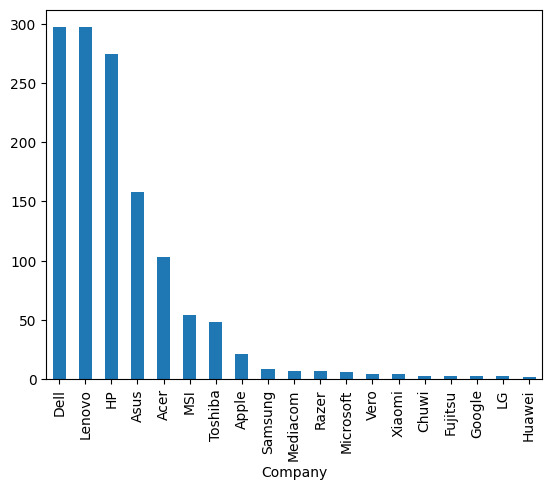

In [13]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

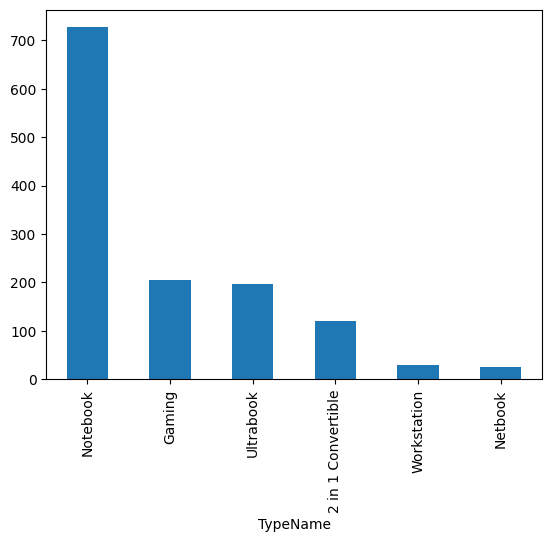

In [14]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='OpSys'>

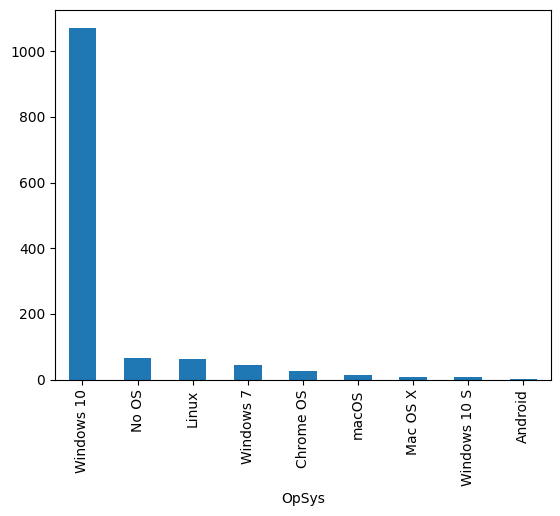

In [15]:
df['OpSys'].value_counts().plot(kind='bar')


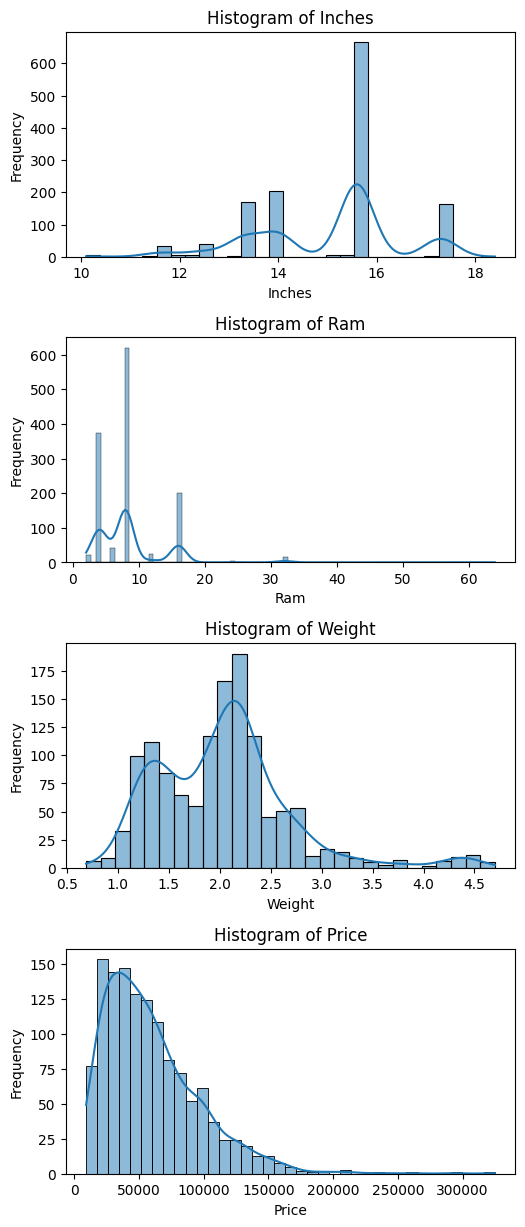

In [16]:
# List of continuous variables
continuous_vars = ['Inches', 'Ram','Weight', 'Price']

# Set up the matplotlib figure
plt.figure(figsize=(10, 15))

# Plot Histograms
for i, var in enumerate(continuous_vars):
    plt.subplot(5, 2, 2*i + 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Inches:**  Notable peaks around 13, 15, and 17 inches suggest these are popular screen sizes, with 15 inches being particularly common.

**RAM:**   Significant peaks at 4GB, 8GB, and 16GB, indicating these are the standard RAM sizes in the market.here is a right skew, meaning higher RAM options like 32GB and 64GB are less common.Higher RAM configurations are likely found in premium or high-performance laptops, whereas 4GB and 8GB configurations cater to budget or mid-range devices.

**Weight** The majority of laptops weigh between 1.5kg and 2.5kg, with a peak around 2kg.The slight skew indicates that most laptops are designed to be lightweight and portable, but there are some heavier models, likely due to larger screens or additional features

**Price** There is a high concentration of laptops in the lower to mid-price range (below 1 lakh), with fewer models in the premium range.The skew suggests that while the majority of laptops are affordable and cater to a mass market, there is also a niche market for high-end, expensive laptops


## Bivariate Analysis

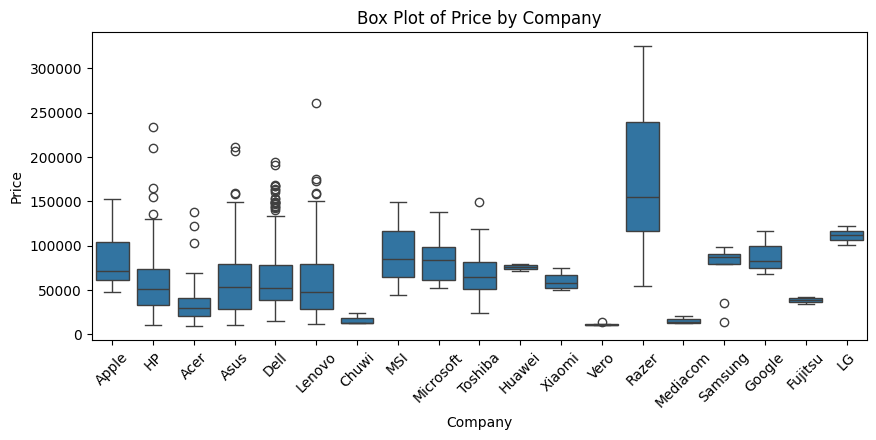

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Company', y='Price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price by Company')
plt.show()

**Apple:** Apple laptops have a higher median price compared to most other companies, with a relatively narrow IQR. This indicates that Apple's pricing is generally high and consistent across its models.

**HP, Dell, Lenovo:** These companies have a moderate median price with wider IQRs, suggesting a diverse range of laptop prices. This likely reflects a variety of models ranging from budget to premium.

**Razer:** Razer shows the highest median price, with a very wide IQR, indicating that Razer laptops are generally expensive, but there is significant variability, possibly due to different models targeting both high-end gaming and more affordable segments.

**Acer:** Acer has a lower median price with a narrower IQR, suggesting that Acer primarily targets the budget and mid-range market segments with less variability in pricing.

**Chuwi and Vero:** These companies show the lowest median prices with minimal variability, indicating they primarily offer budget-friendly laptops.


* Razer's wide IQR and outliers suggest a strategy of catering to different consumer segments, from high-end gaming enthusiasts to more affordable gaming options.

* Apple maintains consistent high pricing with fewer outliers, reflecting its brand positioning as a premium manufacturer.

* Companies like Vero and Chuwi focus on the lower end of the market with minimal price variation, potentially indicating a strategy of offering affordable, entry-level laptops.

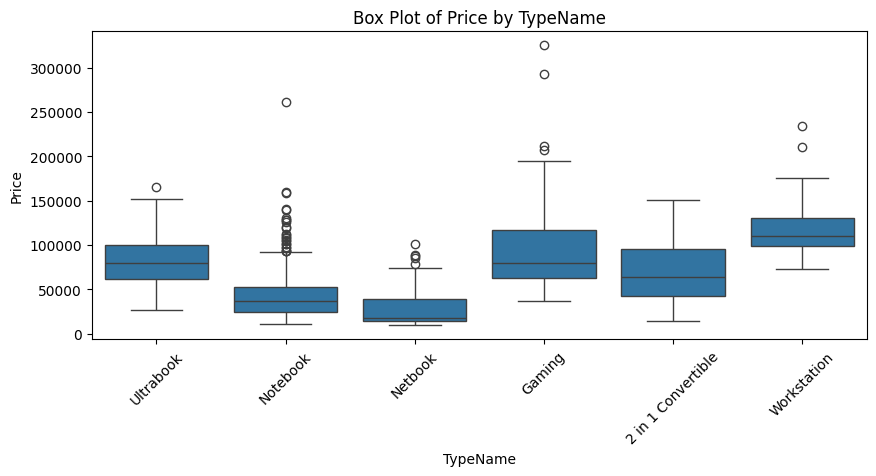

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='TypeName', y='Price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price by TypeName')
plt.show()

**Ultrabook:** Ultrabooks have a relatively high median price, with a moderately wide IQR. This suggests that Ultrabooks are generally priced higher, likely due to their premium build, portability, and performance.

**Notebook:** Notebooks show a lower median price with a wide IQR, indicating a diverse range of prices. This reflects the broad market coverage of notebooks, from budget models to high-end ones.

**Netbook:** Netbooks have the lowest median price with a narrow IQR, indicating that they are typically budget-friendly and have little price variation. This makes sense as netbooks are designed to be low-cost, lightweight laptops with minimal features.

**Gaming:** Gaming laptops have one of the highest median prices and a wide IQR. This reflects the premium nature of gaming laptops, which require powerful hardware and tend to be more expensive. The presence of outliers suggests that some gaming laptops are exceptionally high-priced, possibly due to advanced features like top-tier GPUs.

**2 in 1 Convertible:** These laptops have a moderate to high median price with a relatively wide IQR. The variability suggests that 2-in-1 convertibles cater to both mid-range and high-end segments, appealing to users looking for versatility in a device that can function as both a laptop and a tablet.

**Workstation:** Workstations have a high median price with a moderately wide IQR, indicating that they are typically expensive. This is expected as workstations are designed for professional use with high-performance components, suitable for tasks like 3D rendering and video editing.


* The plot reveals clear stratification in pricing based on the type of laptop. Gaming laptops, workstations, and ultrabooks are consistently more expensive, while notebooks and netbooks occupy the lower price ranges.

* Notebooks and 2-in-1 convertibles show significant price variability, suggesting that these categories cover a broad spectrum of market needs, from basic functionality to more advanced features.

* The outliers in gaming, ultrabooks, and 2-in-1 convertibles suggest that certain models within these categories have specialized or premium features that significantly increase their prices.

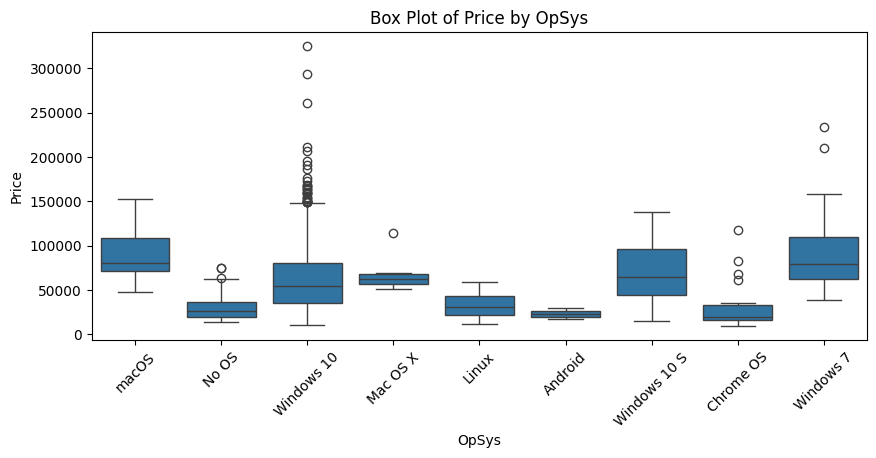

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='OpSys', y='Price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price by OpSys')
plt.show()


**macOS:** Laptops with macOS have a relatively high median price, with a moderately narrow IQR. This suggests that Apple products are consistently priced at a premium, reflecting their positioning as high-end devices.

**No OS:** Laptops without an operating system have a low median price with a narrow IQR. This is likely because these laptops are often sold at lower prices, targeting users who prefer to install their own operating system or those seeking budget options.

**Windows 10:** This category shows a moderate median price with a wide IQR and a significant number of outliers. The wide price range indicates that Windows 10 laptops cover a broad market spectrum, from budget to premium models.

**Mac OS X:** Similar to macOS, laptops with Mac OS X show a high median price with a narrow IQR, reinforcing the premium pricing of Apple products.
Linux: Laptops running Linux have a low median price with a narrow IQR, suggesting they are positioned as budget or specialized devices, often favored by developers or tech enthusiasts looking for cost-effective options.

**Android:** Laptops running Android show a low median price with a narrow IQR, indicating that these devices are likely inexpensive and cater to a niche market.

**Windows 10 S:** This category has a moderate median price with a relatively narrow IQR. Windows 10 S is typically found in mid-range devices, offering a streamlined version of Windows 10.

**Chrome OS:** Laptops with Chrome OS have a low median price with a narrow IQR, reflecting their positioning as budget-friendly devices, often targeted at educational markets or users with basic computing needs.

**Windows 7:** Laptops with Windows 7 show a relatively high median price with a wider IQR, which may indicate that these devices are either older high-end models or specialized systems still in use in certain sectors.

Apple’s macOS and Mac OS X dominate the premium segment, while Linux, Chrome OS, and Android are linked with budget devices. Windows 10 demonstrates significant price variability, catering to a broad range of market needs. The presence of outliers, especially in the Windows 10 category, suggests that certain models with advanced features or specific use cases can command much higher prices.

<Axes: xlabel='Inches', ylabel='Price'>

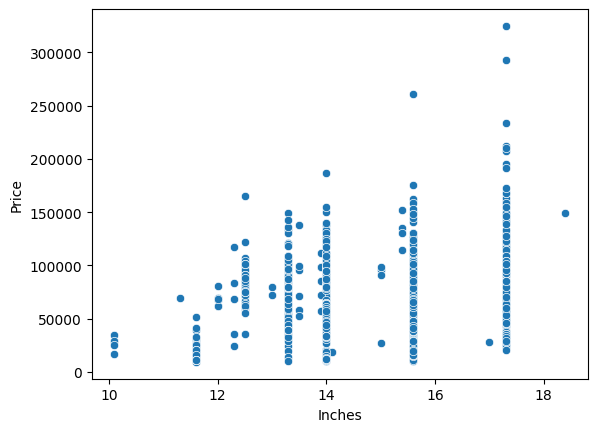

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

There is a general trend where the price increases with screen size (measured in inches). Laptops with larger screens, such as 15-17 inches, tend to be priced higher.

Some outliers exist, where laptops with smaller screen sizes still have high prices. This could indicate premium models with advanced features or brand-specific pricing strategies.

<Axes: xlabel='Ram', ylabel='Price'>

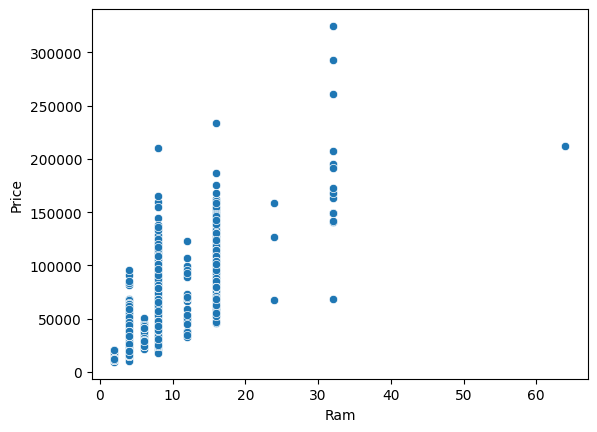

In [21]:
sns.scatterplot(x=df['Ram'],y=df['Price'])

As the amount of RAM increases, the price generally increases as well. Laptops with higher RAM configurations, such as 16 GB and above, tend to have significantly higher prices.

There's a noticeable cluster of laptops with 8 GB RAM around the mid-price range, which might indicate that this is a common configuration for mid-range laptops.

A few outliers show very high prices, even with high RAM values, possibly reflecting high-performance or specialized laptops.


<Axes: xlabel='Weight', ylabel='Price'>

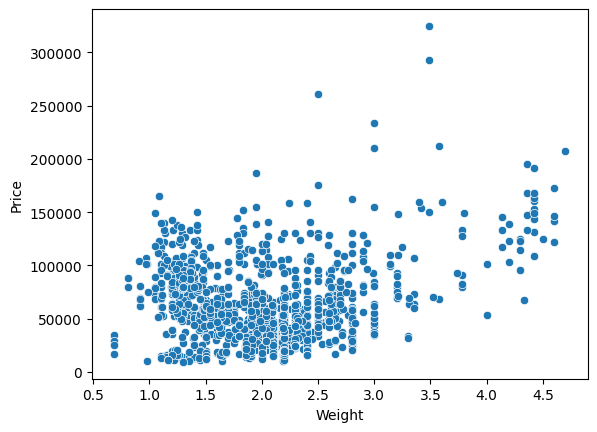

In [22]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

The relationship between weight and price is less clear compared to the other two features. Most laptops are clustered around a weight of 1 to 3 kg, with prices distributed across a wide range.

Heavier laptops (around 4 kg or more) seem to include some of the higher-priced models. However, there are also lightweight laptops with high prices, likely ultrabooks or premium models.

# Feature Engineering

## Creating New Features

#### Touchscreen

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1089,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,20619.3600,0
1023,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,63159.7104,0
603,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,117162.7200,0
384,Asus,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,93181.3920,1
1243,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,95850.7200,1


#### Ips

In [26]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


#### X_res & Y_res

In [28]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [29]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,1366,768
895,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,78588.0000,0,0,Full HD 1920,1080
611,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0,0,Full HD 1920,1080
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,98834.4000,0,0,Full HD 1920,1080
271,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,82530.7200,0,0,Full HD 1920,1080


In [31]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

#### Ppi

In [34]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [35]:
df.drop(columns=['Inches','X_res','Y_res','ScreenResolution'],inplace=True)

In [36]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


#### CPU Brand

In [37]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [38]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [40]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [41]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [42]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [43]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


#### GPU Brand

In [44]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [45]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [46]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [47]:
df = df[df['Gpu brand'] != 'ARM']

In [48]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [49]:
df.drop(columns=['Gpu'],inplace=True)

In [50]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


#### OS

In [51]:
df['OpSys'].value_counts()


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [52]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [53]:
df['os'] = df['OpSys'].apply(cat_os)


In [54]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [55]:
df.drop(columns=['OpSys'],inplace=True)

#### Memory

In [56]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [57]:
import pandas as pd

# Replace '.0' and remove 'GB' and 'TB'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into two parts
new = df["Memory"].str.split("+", n=1, expand=True)

# Clean and strip spaces
df["first"] = new[0].str.strip()

# Check if the second part exists and replace None with "0"
df["second"] = new[1].str.strip() if new.shape[1] > 1 else "0"
df["second"].fillna("0", inplace=True)  # Ensures that 'second' is not None

# Create binary flags for storage types before numeric conversion
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Replace non-numeric characters in 'first' and 'second'
df["first"] = df["first"].str.replace(r'\D', '', regex=True)
df["second"] = df["second"].str.replace(r'\D', '', regex=True)

# Convert the cleaned 'first' and 'second' columns to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the total capacities for each storage type
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\freev\AppData\Local\Temp\ipykernel_4124\2834611207.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\freev\AppData\Local\Temp\ipykernel_4124\2834611207.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace=True)  # Ensures that 'second' is not None


,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,0,128
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,0,256,0,0


In [58]:
df.drop(columns=['Memory'],inplace=True)
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [59]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,0,256


## Correlation Analysis

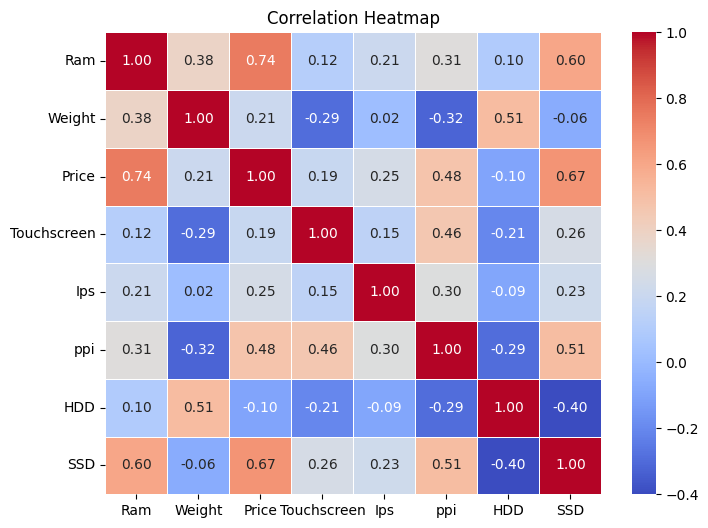

In [60]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the Correlation Heatmap
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Strong Positive Correlations:**

`Ram and Price (0.74):` There is a strong positive correlation between the amount of RAM and the price of the laptop. As the RAM increases, the price also tends to increase. This suggests that RAM is a significant determinant of the laptop's cost.

`SSD and Price (0.67):` Laptops with larger SSDs are priced higher. SSDs tend to be more expensive, so this makes sense.

`Ram and SSD (0.60):` Laptops with more RAM tend to have larger SSD storage. This reflects the trend in modern laptops where high-performance machines often combine more RAM with SSDs for faster performance.

`ppi and Price (0.48):` Laptops with higher pixel density (ppi) screens are generally more expensive, which indicates that display quality is also a cost driver.
    
**Weak or Moderate Correlations:**

`Weight and SSD (0.51):` Laptops with SSDs tend to be lighter. SSDs are physically smaller and lighter compared to HDDs, which likely contributes to this relationship.

`ppi and Touchscreen (0.46):` Laptops with touchscreens also tend to have higher pixel density, likely because touchscreen devices may require better display quality for a good user experience.

`Touchscreen and Price (0.19):` There is a weak positive correlation between touchscreen and price, indicating that while touchscreens slightly increase the price, they are not a primary driver of cost.

`HDD and Weight (0.51):` Laptops with HDDs tend to be heavier, which is understandable given that HDDs are bulkier compared to SSDs.
    
**Negative Correlations:**

`Weight and ppi (-0.32):` Laptops with higher pixel density screens tend to be lighter. This might be due to modern, lightweight laptops focusing on high-resolution displays for better portability and user experience.

`Weight and SSD (-0.06):` There is a slightly negative correlation, meaning lighter laptops tend to have SSDs over HDDs.
    
**No Significant Correlation:***

`Touchscreen and Ram (0.12):` There is little correlation between the presence of a touchscreen and the amount of RAM, suggesting that RAM does not heavily impact whether or not a laptop has a touchscreen.

`Ips (In-Plane Switching technology for displays) and Price (0.25):` While IPS screens are positively correlated with price, the correlation is weaker, indicating that this factor plays a less significant role in determining the price.

Laptops with high RAM, SSD, and higher ppi (display resolution) tend to be higher priced. This reflects market demand for performance and quality, with laptops combining these features commanding a premium price.

Laptops that are lighter often have SSDs instead of HDDs and high-resolution displays (ppi). This indicates a trend toward portability, where consumers may prefer lighter, high-resolution machines over heavier ones with older technology like HDDs.

While the heatmap doesn’t indicate severe multicollinearity, we should still check this in more detail to ensure robust model performance.RAM and SSD size are highly correlated with price, meaning these should be prioritized if cost is a primary factor in purchasing decisions.

## Checking Multicollinearity

In [61]:
# Import necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the dataset
# First, you should only select the numeric columns to calculate VIF

# Example dataframe of numeric features
numeric_columns = ['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD']

# Standardizing the features (VIF works better when features are scaled)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

# Display the VIF values
print(vif_data)


       Feature       VIF
0          Ram  3.067345
1       Weight  2.051582
2        Price  2.996994
3  Touchscreen  1.315171
4          Ips  1.130486
5          ppi  2.018742
6          HDD  1.789804
7          SSD  2.815358


Since none of the VIF values exceed 5, multicollinearity doesn't seem to be a major problem in this dataset.

## Outliers

In [62]:
import pandas as pd

df_numeric = df[['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD']]  # Select relevant numeric columns from the DataFrame

# Step 2: Apply the IQR method for detecting outliers
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Detect outliers for each column separately
for col in df_numeric.columns:
    print(f"\nRows containing outliers in column '{col}':")
    # Define outlier condition for the current column
    outlier_condition = (df_numeric[col] < (Q1[col] - 1.5 * IQR[col])) | (df_numeric[col] > (Q3[col] + 1.5 * IQR[col]))
    
    # Extract rows with outliers in the current column
    outlier_rows = df[outlier_condition]
    
    # Print outlier rows if any exist
    if not outlier_rows.empty:
        print(outlier_rows)
    else:
        print("No outliers detected.")



Rows containing outliers in column 'Ram':
     Company            TypeName  Ram  Weight        Price  Touchscreen  Ips  \
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
6      Apple           Ultrabook   16    2.04  114017.6016            0    1   
8       Asus           Ultrabook   16    1.30   79653.6000            0    0   
12     Apple           Ultrabook   16    1.83  130001.6016            0    1   
17     Apple           Ultrabook   16    1.83  152274.2400            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1247    Asus              Gaming   16    2.34  123876.0000            0    1   
1256    Asus              Gaming   16    4.00  101232.0000            0    1   
1271  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1285  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1 

C:\Users\freev\AppData\Local\Temp\ipykernel_4124\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

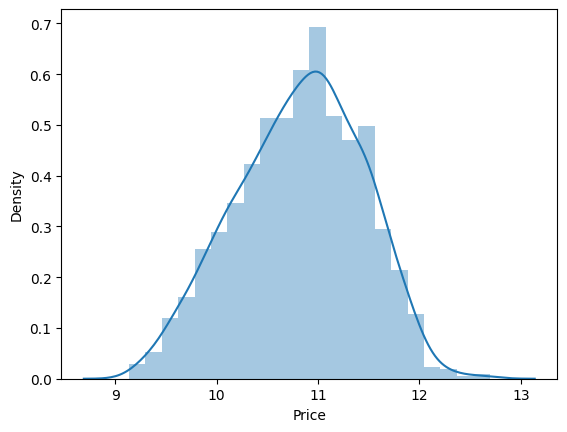

In [63]:
sns.distplot(np.log(df['Price']))

# Modelling

## Split the data

In [64]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

## One Hot Encoding & Normalizing 

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# List of categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']

# Define ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numerical features
step1 = ColumnTransformer(
    transformers=[
        ('cat_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_features),
        ('num_tnf', StandardScaler(), ['Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'])  # Standardize numeric features
    ],
    remainder='passthrough'
)


## Linear Regression

In [68]:
# Define Linear Regression Model
step2 = LinearRegression()

# Create the Pipeline
lr = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline with training data
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.807452955953007
MAE: 0.20953335384794006


## Ridge Regression

In [69]:
# Define Ridge Regression model
ridge_model = Ridge()

# Create the Pipeline
ridge_pipe = Pipeline([
    ('step1', step1),  # Use the same step1 from the previous example for preprocessing
    ('step2', ridge_model)
])

# Fit and evaluate the model
ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)

print('Ridge R2 score:', r2_score(y_test, y_pred_ridge))
print('Ridge MAE:', mean_absolute_error(y_test, y_pred_ridge))


Ridge R2 score: 0.8093995078710143
Ridge MAE: 0.2096542042345226


## Lasso Regression

In [70]:
# Define Lasso Regression model
lasso_model = Lasso()

# Create the Pipeline
lasso_pipe = Pipeline([
    ('step1', step1),
    ('step2', lasso_model)
])

# Fit and evaluate the model
lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_test)

print('Lasso R2 score:', r2_score(y_test, y_pred_lasso))
print('Lasso MAE:', mean_absolute_error(y_test, y_pred_lasso))

Lasso R2 score: -0.004410669401108347
Lasso MAE: 0.5027070079762014


## KNN

In [71]:
# Define K-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Create the Pipeline
knn_pipe = Pipeline([
    ('step1', step1),
    ('step2', knn_model)
])

# Fit and evaluate the model
knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)

print('KNN R2 score:', r2_score(y_test, y_pred_knn))
print('KNN MAE:', mean_absolute_error(y_test, y_pred_knn))

KNN R2 score: 0.8408846467575076
KNN MAE: 0.17987570089636074


## Decison Tree

In [72]:
# Define Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Create the Pipeline
tree_pipe = Pipeline([
    ('step1', step1),
    ('step2', tree_model)
])

# Fit and evaluate the model
tree_pipe.fit(X_train, y_train)
y_pred_tree = tree_pipe.predict(X_test)

print('Decision Tree R2 score:', r2_score(y_test, y_pred_tree))
print('Decision Tree MAE:', mean_absolute_error(y_test, y_pred_tree))

Decision Tree R2 score: 0.7834354503190992
Decision Tree MAE: 0.20753028506481627


## SVM

In [73]:
# Define Support Vector Machine model
svm_model = SVR(kernel='rbf')  # You can change the kernel to 'linear' or 'poly'

# Create the Pipeline
svm_pipe = Pipeline([
    ('step1', step1),
    ('step2', svm_model)
])

# Fit and evaluate the model
svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)

print('SVM R2 score:', r2_score(y_test, y_pred_svm))
print('SVM MAE:', mean_absolute_error(y_test, y_pred_svm))

SVM R2 score: 0.8855291177001197
SVM MAE: 0.15982024328717423


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Define Random Forest model
rf_model = RandomForestRegressor()  

# Create the Pipeline
rf_pipe = Pipeline([
    ('step1', step1),
    ('step2', rf_model)
])

# Fit and evaluate the model
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

print('Random Forest R2 score:', r2_score(y_test, y_pred_rf))
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred_rf))


Random Forest R2 score: 0.8862640967507117
Random Forest MAE: 0.1558719085659208


## Adaboost

In [75]:
ada_model = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

ada_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

ada_pipe.fit(X_train,y_train)

y_pred_ada = ada_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.807452955953007
MAE 0.20953335384794006


## Gradient Boosting

In [76]:
gb_model = GradientBoostingRegressor(n_estimators=500)

gb_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

gb_pipe.fit(X_train,y_train)

y_pred_gb = gb_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.807452955953007
MAE 0.20953335384794006


## XgBoost

In [77]:
xgb_model = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

xgb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.807452955953007
MAE 0.20953335384794006


## Voting Regressor

In [80]:
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
svr = SVR(C=100, kernel='rbf', gamma='scale')

# Voting Regressor: Including RandomForest and SVR
step2 = VotingRegressor([('rf', rf), ('svr', svr)], weights=[1, 1])

# Pipeline
pipe_voting = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe_voting.fit(X_train, y_train)

# Make predictions
y_pred = pipe_voting.predict(X_test)

# Metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8979207291293257
MAE: 0.149831116236925


## Stacking

In [82]:
# Regressors
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
svr = SVR(C=100, kernel='rbf', gamma='scale')

# Define the estimators for the Stacking Regressor
estimators = [('rf', rf), ('svr', svr)]  # List of base regressors

# Stacking Regressor with Ridge as the final estimator
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8888033308273803
MAE: 0.15822551842243876


## Exporting the model

In [83]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_voting,open('pipe_voting.pkl','wb'))

In [84]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel,Windows,0,128
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel,Windows,0,512
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,Intel,Windows,0,0
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,AMD,Windows,1000,0
